In [5]:
import numpy as np
import pandas as pd
import seaborn as sns                                                                          #alcohol and tobacco
import missingno as msno
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("C:/Users/Morad/Desktop/projects/project_2/HICP - alcohol and tobacco.csv")

In [47]:
#df
# the data consists of some information about the amount money
# europian spent on alcoho; and tobacco per months from 11/2024 - 10/2025 

In [48]:
df = df.rename(columns = {
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "price"
})
df_AT = df[["country","year","price"]]   #chose the needed columns to calculate different function 

In [49]:
'''
chosen countries max =  Lithuania 
                 moderate = Ireland
                 min =  Cyprus, Italy
'''
#1
country = ["Lithuania", "Ireland", "Italy", "Cyprus"]
filtter_Graph = (df_AT["country"].isin(country))
df_AT_M = df_AT.loc[filtter_Graph, ["country","year","price"]]
df_AT_M

,country,year,price
60,Cyprus,2024-11,102.79
61,Cyprus,2024-12,101.86
62,Cyprus,2025-01,102.08
63,Cyprus,2025-02,102.05
64,Cyprus,2025-03,101.95
65,Cyprus,2025-04,101.68
66,Cyprus,2025-05,101.86
67,Cyprus,2025-06,101.83
68,Cyprus,2025-07,102.13
69,Cyprus,2025-08,101.96


In [12]:
df_AT_M_F = df_AT_M.copy()
df_AT_M_F["price"] = df_AT_M["price"] - 100

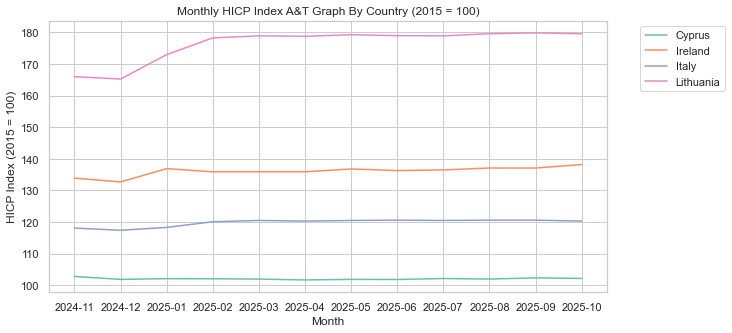

In [43]:
#fig1
sns.set_theme(style = "whitegrid")
plt.figure(figsize =(10,5))
sns.lineplot(data = df_AT_M  , x = "year", y = "price",hue = "country",palette = "Set2")     

plt.title("Monthly HICP Index A&T Graph By Country (2015 = 100)")
plt.ylabel("HICP Index (2015 = 100)")
plt.xlabel("Month")
plt.legend(bbox_to_anchor= (1.05,1), loc ="upper left")

In [29]:
#2
total_change = (df_AT_M.groupby("country")
                .apply(lambda x : (x["price"].iloc[-1] / x["price"].iloc[0] -1 ) * 100)
                .reset_index(name = "total_change_pct")
            )
total_change

,country,total_change_pct
0,Cyprus,-0.612900
1,Ireland,3.211352
2,Italy,1.862828
3,Lithuania,8.180230


Text(0.5, 1.0, 'Cumulative Change % - Nov 2024 to Oct 2025')

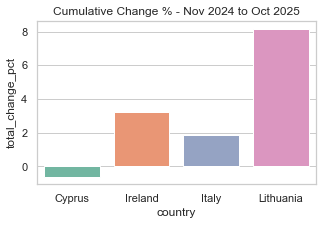

In [30]:
#fig2
sns.set_theme(style = "whitegrid")
plt.figure(figsize =(5,3))
sns.barplot(data = total_change ,x = "country" , y = "total_change_pct", palette = "Set2")    

plt.title("Cumulative Change % - Nov 2024 to Oct 2025")


In [37]:
e_1 = df_AT_M.groupby("country")["price"].agg(["min"]).sort_values("min",ascending = True)

In [38]:
e_2 = df_AT_M.groupby("country")["price"].agg(["std"]).sort_values("std",ascending = True).round(2)

In [39]:
e_3 = df_AT_M.groupby("country")["price"].agg(["mean"]).sort_values("mean",ascending = True).round(2)

In [40]:
e_4 = df_AT_M.groupby("country")["price"].agg(["max"]).sort_values("max",ascending = True)

In [42]:
AT_table = e_1.join([e_2,e_3,e_4,]) 
AT_table["delta"] = (e_4["max"] - e_1["min"])
AT_table = pd.DataFrame(data = AT_table).sort_values("delta", ascending = False)
AT_table

,min,std,mean,max,delta
country,,,,,
Lithuania,165.25,5.34,176.37,179.87,14.62
Ireland,132.70,1.49,136.10,138.20,5.50
Italy,117.40,1.16,119.82,120.60,3.20
Cyprus,101.68,0.29,102.06,102.79,1.11
